### Replicating non-linear activation functions
Non-linear data can be combination of linear and non-linear data.
Linear data can be separated by a straight line example weight and animal class cat or dog whereas non-linear can color intensity of cat/dog, weight, tails length or we can simply say non-linear data that cannot be separated by a straight line.

In [238]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import os
import urllib.request
# from torch.utlis.data import DataLoader

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


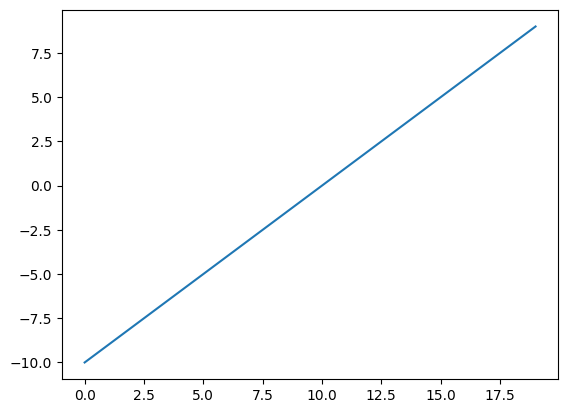

In [5]:
# Create a toy tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
print(A)

plt.plot(A)

# Adding non-linearity to this linear data! Let's see what happens? using ReLU
### The beauty of machine learning or deep learning is we tell the model what to predict or find the patterns in the given data and it does

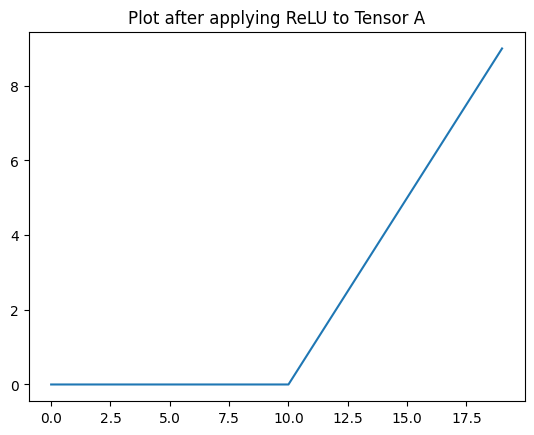

In [140]:
# create ReLu Function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# pass toy tensor A through ReLU Function
C= relu(A)
plt.title("Plot after applying ReLU to Tensor A")
plt.plot(C)



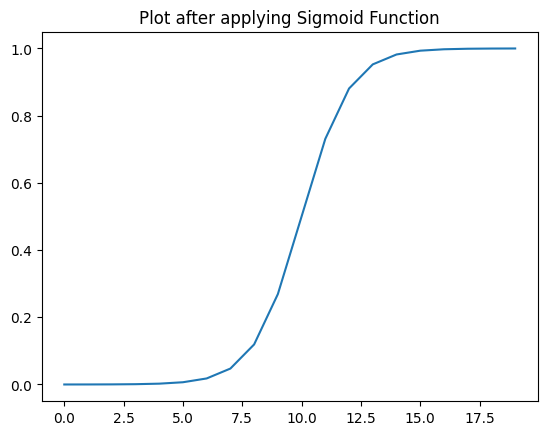

In [142]:

# binary classification or sigmoid
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

# Test custom sigmoid on toy tensor
S = sigmoid(A)
plt.title("Plot after applying Sigmoid Function")
plt.plot(S)

## Multi-Class Classification in PyTorch
We understand it using clusters of data or we use simply SK-Learn make_blobs() method.

- -Create some multi-class data with make_blobs().
- Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
- Split the data into training and test sets using train_test_split().
- Visualize the data.


[[-8.41339595  6.93516545]
 [-5.76648413 -6.43117072]
 [-6.04213682 -6.76610151]
 [ 3.95083749  0.69840313]
 [ 4.25049181 -0.28154475]]
[3 2 2 1 1]
X first 5 tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) y target for each first 5 tensor([3, 2, 2, 1, 1])
tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]]) tensor([[ 4.6675,  4.4878],
        [-7.9969,  6.8803],
        [-6.2801, -7.8571],
        [ 3.6833,  1.1767],
        [-0.1404, 10.1654]]) tensor([1, 0, 2, 2, 0]) tensor([1, 3, 2, 1, 0])
 THIS IS NON-LINEARITY PROBLEM IS BECAUSE YOU CANNOT DRAW STRAIGHT LINE THROUGH IT!!!


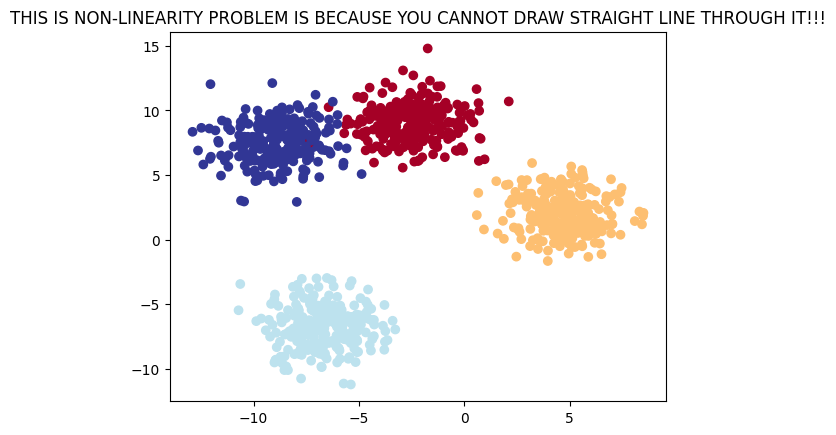

In [143]:
# setting the hyperparamters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. CREATE MULTI CLASS DATA WITH Y TARGET > 2 CLASS
X_blob, y_blob = make_blobs(
    n_samples = 1000,
    centers = NUM_CLASSES, # X features
    cluster_std=1.5,
    random_state= RANDOM_SEED
    )
print(X_blob[:5])
print(y_blob[:5])
print("===========================================")
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print("X first 5", X_blob[:5], "y target for each first 5", y_blob[:5])
print("===========================================")
# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob,
    y_blob,
    test_size = 0.2,
    random_state=RANDOM_SEED
)
print("===========================================")
print(X_blob_train[:5], X_blob_test[:5], y_blob_train[:5], y_blob_test[:5] )

# plot data
plt.title("THIS IS NON-LINEARITY PROBLEM IS BECAUSE YOU CANNOT DRAW STRAIGHT LINE THROUGH IT!!!")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
print(" THIS IS NON-LINEARITY PROBLEM IS BECAUSE YOU CANNOT DRAW STRAIGHT LINE THROUGH IT!!!")

#### Building Model for Multi-Class

In [151]:

# Build Model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
"""

    # here we have initialized all the required parameters for a multi-calss classification model
    # args are input_features: number of input features to the model
    # output_features: number of output features of the model (how many classes are there)
    # hidden units: number of hidden units between layers
"""
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


cpu


## Creating a loss function and optimizer for a multi-class pytorchmodel and getting prediction probabilities for a multi-class PyTorch Model
#### WE USE nn.CROSSENTROPYLOSS() AS LOSS FUNCTION AND SGD AS AN OPTIMIZER WITH LR=0.1

In [152]:
# CREATE LOSS AND OPTIMIZER
loss_fn = nn.CrossEntropyLoss()
model_4 = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES, hidden_units=32).to(device)
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.5) # try to use small lr

# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

# checking the shape
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES
print("It means one value for each class here we have 4 class. for each class one scalar value prediction that is y either 0 ,1 2, 3")
print("flow is --> logits --> prediction prob. --> prediction labels")


# make predictions logits with model
print("Logits")
y_logits = model_4(X_blob_test.to(device))

# performing softmax
print("pred. probs")
y_pred_probs = torch.softmax(y_logits, dim=1)
print("printing first 5 logits 5 predict ")
print(y_logits[:5])
print(y_pred_probs[:5])


# check which index has the highest value using torch.argmax()
print(y_pred_probs[2]) # try changing the value [3] here to see the prediction
print(torch.argmax(y_pred_probs[0]))

print("ALL THE VARIABLES AND PARAMETERS ARE IN THE UPPER CELLS DO CHECK THEM!!!!")

It means one value for each class here we have 4 class. for each class one scalar value prediction that is y either 0 ,1 2, 3
flow is --> logits --> prediction prob. --> prediction labels
Logits
pred. probs
printing first 5 logits 5 predict 
tensor([[ 0.3763, -0.4018,  0.1130,  0.8402],
        [ 1.1933, -0.0987, -0.6924,  0.3907],
        [ 0.3299,  0.3886, -0.0077, -0.5605],
        [ 0.2384, -0.1051,  0.2618,  0.6829],
        [ 0.5900, -0.4693, -0.9074,  0.4963]], grad_fn=<SliceBackward0>)
tensor([[0.2619, 0.1203, 0.2013, 0.4165],
        [0.5334, 0.1466, 0.0809, 0.2391],
        [0.3140, 0.3330, 0.2241, 0.1289],
        [0.2329, 0.1652, 0.2385, 0.3633],
        [0.4031, 0.1397, 0.0902, 0.3670]], grad_fn=<SliceBackward0>)
tensor([0.3140, 0.3330, 0.2241, 0.1289], grad_fn=<SelectBackward0>)
tensor(3)
ALL THE VARIABLES AND PARAMETERS ARE IN THE UPPER CELLS DO CHECK THEM!!!!


# Training and Testing Loop for a multi class pytorch model

Let's do that in loop instead of single step performed in the above cell.

Logits are just the raw outputs from the final layer of a neural network before applying softmax (or sigmoid).

We can think of them as unscaled scores or unnormalized predictions.

- logits = model(x)  # this might give something like:

- Output → tensor([2.5, 0.3, -1.2])

- These numbers (2.5, 0.3, -1.2) are logits.

- To convert them into probabilities, you apply softmax:

- probs = torch.softmax(logits, dim=0)

- probs might now be: tensor([0.81, 0.15, 0.04])


In [155]:
# fit the model
torch.manual_seed(42)

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()  # count of correct predictions
    acc = (correct / len(y_pred)) * 100              # accuracy percentage
    return acc


# set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  ### TRAINING STARTED
  model_4.train()


  # 1.FORWARD PASS
  y_logits = model_4(X_blob_train)  #model output raw logits
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim = 1) # go from logits --> prediction probabilities

  # 2. LOSS AND ACCURACY
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  optimizer.step()

  # 5. Optimizer step
  optimizer.step()

  ### testing
  model_4.eval()

  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_4(X_blob_test) # logits
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1) # pred.prob

    # 2. calculate the loss and accuracy
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    # print out what's happening
    if epoch % 10 == 0:
      print(f"⚙️ Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")


⚙️ Epoch: 0 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 10 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 20 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 30 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 40 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 50 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 60 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 70 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 80 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%
⚙️ Epoch: 90 | Loss: 1.45152, Acc: 24.38 | Test Loss: 1.42876, test acc: 24.00%


## Making and Evaluating predictions and Plots

tensor([[ 0.3763, -0.4018,  0.1130,  0.8402],
        [ 1.1933, -0.0987, -0.6924,  0.3907],
        [ 0.3299,  0.3886, -0.0077, -0.5605],
        [ 0.2384, -0.1051,  0.2618,  0.6829],
        [ 0.5900, -0.4693, -0.9074,  0.4963],
        [ 1.3992, -0.0602, -0.7805,  0.4080],
        [ 0.2591,  0.3921, -0.0150, -0.5216],
        [ 0.6678, -0.3968, -0.7932,  0.4295],
        [ 0.4717,  0.4085,  0.0105, -0.6559],
        [ 0.6180, -0.4057, -0.8212,  0.4438]])

Let's convert our model's prediction logits to prediction probabilities (using torch.softmax()) then to prediction labels (by taking the argmax() of each sample).
Note: It's possible to skip the torch.softmax() function and go straight from predicted logits -> predicted labels by calling torch.argmax() directly on the logits

Predictions: tensor([3, 0, 1, 3, 0, 0, 1, 0, 0, 0]) | Labels] tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 24.0000%


<ipython-input-156-182f4c4f3dd8>:29: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
<ipython-input-156-182f4c4f3dd8>:30: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, h))


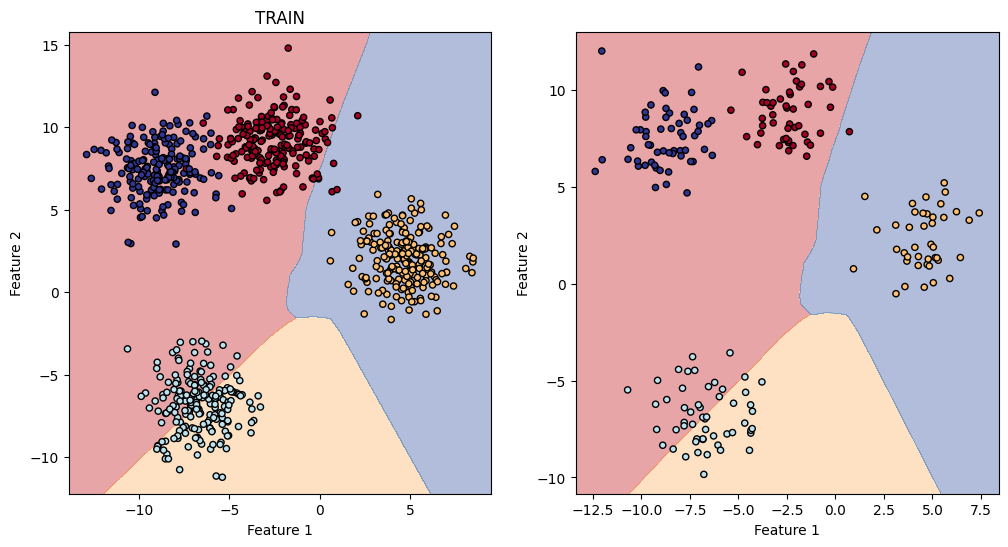

In [156]:
# make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# view the first 10 predictions
out = y_logits[:10]
print(out)

print("""
Let's convert our model's prediction logits to prediction probabilities (using torch.softmax()) then to prediction labels (by taking the argmax() of each sample).
Note: It's possible to skip the torch.softmax() function and go straight from predicted logits -> predicted labels by calling torch.argmax() directly on the logits
""")

y_pred_probs = torch.softmax(y_logits, dim = 1)
y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]} | Labels] {y_blob_test[:10]}")
print(f"Test accuracy: { accuracy_fn(y_true=y_blob_test, y_pred=y_preds):.4f}%")


def plot_decision_boundary(model, X, y, device='cpu'):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Flatten the grid to pass through model
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

    # Get model predictions
    model.eval()
    with torch.no_grad():
        preds = model(grid_tensor)
        preds = torch.softmax(preds, dim=1)
        predicted_classes = preds.argmax(dim=1).cpu().numpy()

    # Put the result into a color plot
    Z = predicted_classes.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    # Also plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y.cpu().numpy(), s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("TRAIN")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2, 2)
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


# Computer Vision in PyTorch

Computer vision is the art of teaching a computer to see.

For example, it could involve building a model to classify whether a photo is of a cat or a dog (binary classification).

Or whether a photo is of a cat, dog or chicken (multi-class classification).

Or identifying where a car appears in a video frame (object detection).

Or figuring out where different objects in an image can be separated (panoptic segmentation).

### What we cover?
#### 0. Computer Vision Libraries in PyTorch
#### 1. Load Data
#### 2. Prepare Data


##### The torch.utils.data.Dataset and torch.utils.data.DataLoader classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.




In [207]:
# Import torch vision
import torch
import math
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import requests

print(f"PyTorch Version:  {torch.__version__} | torch version: {torchvision.__version__}")

PyTorch Version:  2.6.0+cu124 | torch version: 0.21.0+cu124


**torch — core PyTorch**

**torchvision — main vision package**

 **datasets — built-in datasets**

 **models — pretrained model architectures**

 **transforms — image preprocessing**

 **Dataset — base class for datasets**

 **DataLoader — batching and loading databold**

In [222]:
print("1. GETTING A DATASET  EMNIST")

# Transform | can add resize,normalize, flips and other data augmentation techniques here
transform = transforms.Compose([transforms.ToTensor()]) # since transform is just a container
print("transformed", transform.transforms)


print("=== LETS UNDERSTAND THE BUCN OF COMPUTER VISION DATASETS STORED IN TORCHVISION.DATASETS ===")
print("1. root: str mean which folder to download the load to")
print("2. train: bool want to train or test split?")
print("3. download: should the data to be downloaded?")
print("4. Apply transformation using torchvision.transforms and target_transform to transform the targets (lables)")


# download the emnist balanced split(digits+letters) online
train_dataset = datasets.EMNIST(root="./data", split="balanced", train=True, download=True, transform=transform)
test_dataset = datasets.EMNIST(root="./data", split="balanced", train=False, download=True, transform=transform)

train_data = train_dataset
test_data = test_dataset

print(f"EMNIST dataset downloaded and loaded!!")
print(f"Number of training sample: {len(train_dataset)}")
print(f"Number of test samples: {len(test_dataset)}")

1. GETTING A DATASET  EMNIST
transformed [ToTensor()]
=== LETS UNDERSTAND THE BUCN OF COMPUTER VISION DATASETS STORED IN TORCHVISION.DATASETS ===
1. root: str mean which folder to download the load to
2. train: bool want to train or test split?
3. download: should the data to be downloaded?
4. Apply transformation using torchvision.transforms and target_transform to transform the targets (lables)
EMNIST dataset downloaded and loaded!!
Number of training sample: 112800
Number of test samples: 18800


image 0 shape: torch.Size([1, 28, 28]) | label: 45


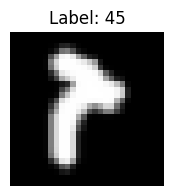

image 1 shape: torch.Size([1, 28, 28]) | label: 36


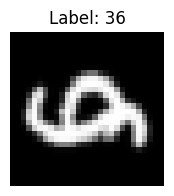

image 2 shape: torch.Size([1, 28, 28]) | label: 43


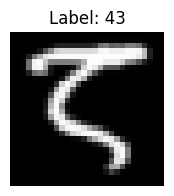

image 3 shape: torch.Size([1, 28, 28]) | label: 15


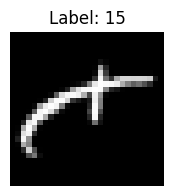

image 4 shape: torch.Size([1, 28, 28]) | label: 4


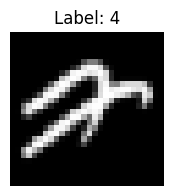

IMAGE SHAPE ---> C, H, W torch.Size([1, 28, 28])
[color_channels=1, height=28, width=28]


In [219]:
## viewing the training sample
image, label = train_dataset[5]
# print(image, label)
for i in range(5):
  image, label = train_dataset[i]
  print(f"image {i} shape: {image.shape} | label: {label}")

  plt.figure(figsize=(2,2))

  # image is a tensor of shape(1, 28,28) we need to sequeze to (28,28) for plotting
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(f"Label: {label}")
  plt.axis("off")
  plt.show()


# checking the iamge shape
print("IMAGE SHAPE ---> C, H, W", image.shape)
print("[color_channels=1, height=28, width=28]")


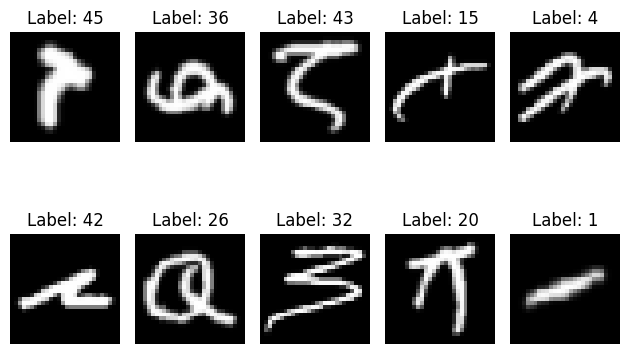

In [215]:
# EMNIST balanced mapping of labels (0-46) to characters:
num_images = 10
cols = 5
rows = math.ceil(num_images / cols)

for i in range(num_images):
    image, label = train_dataset[i]
    img = image.squeeze().numpy()
    img_rgb = np.stack([img]*3, axis=2)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.tight_layout()  # Adjust spacing
plt.show()

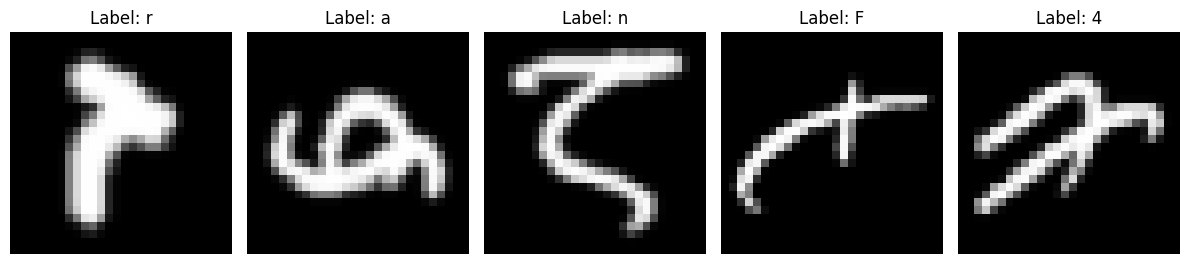

# How many samples are there? 
Number of training samples: 112800
Number of test samples: 18800
112800 112800 18800 18800
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


In [229]:
# Load the label mapping
# EMNIST balanced classes: 0-9 digits, A-Z uppercase, a-z lowercase (in total 47 classes)
# The actual EMNIST balanced mapping includes digits + letters but skips some lowercase letters
# Here's a safe approximation including digits, uppercase A-Z, and common lowercase letters present in EMNIST balanced:

label_to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4',
    5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',
    36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

# Now plot first 5 images with correct labels
plt.figure(figsize=(12, 3))

for i in range(5):
    image, label = train_dataset[i]
    img = image.squeeze().numpy()
    img_rgb = np.stack([img]*3, axis=2)

    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"Label: {label_to_char[label]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

print("# How many samples are there? ")
print(f"Number of training samples: {len(train_data)}"),
print(f"Number of test samples: {len(test_data)}"),
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))

class_names = train_data.classes
print(class_names)

# DataLoader in PyTorch

torch.utils.data.DataLoader wraps your Dataset and splits it into mini-batches.

We can shuffle the data each epoch by setting shuffle=True.

The batch_size parameter controls how many samples per batch.



In [236]:
## DATA LOADER IN PYTORCH
print("DATA LOADER IN PYTORCH")

# BATCH SIZE
BATCH_SIZE = 32

# TURN THE DATASETS INTO ITERABLES(BATCHES)
train_dataloader = DataLoader(
    train_data, # make it iterable
    batch_size = BATCH_SIZE, # how many samples or images per batch?
    shuffle = True # shuffle data for every epoch
    )

test_dataloader = DataLoader(
    train_data, # make it iterable
    batch_size = BATCH_SIZE, # how many samples or images per batch?
    shuffle = False # shuffle data for every epoch
    )

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print("train_features_batch.shape | ", "train_labels_batch.shape")
print(train_features_batch.shape," | ",  train_labels_batch.shape)

DATA LOADER IN PYTORCH
train_features_batch.shape |  train_labels_batch.shape
torch.Size([32, 1, 28, 28])  |  torch.Size([32])
